In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [46]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = 'data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
print('Finish Loading!')
del df1
display(df[0][:1])

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015
Finish Loading!


In [54]:
display(df[0][:1])

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4


# Age Band Analysis

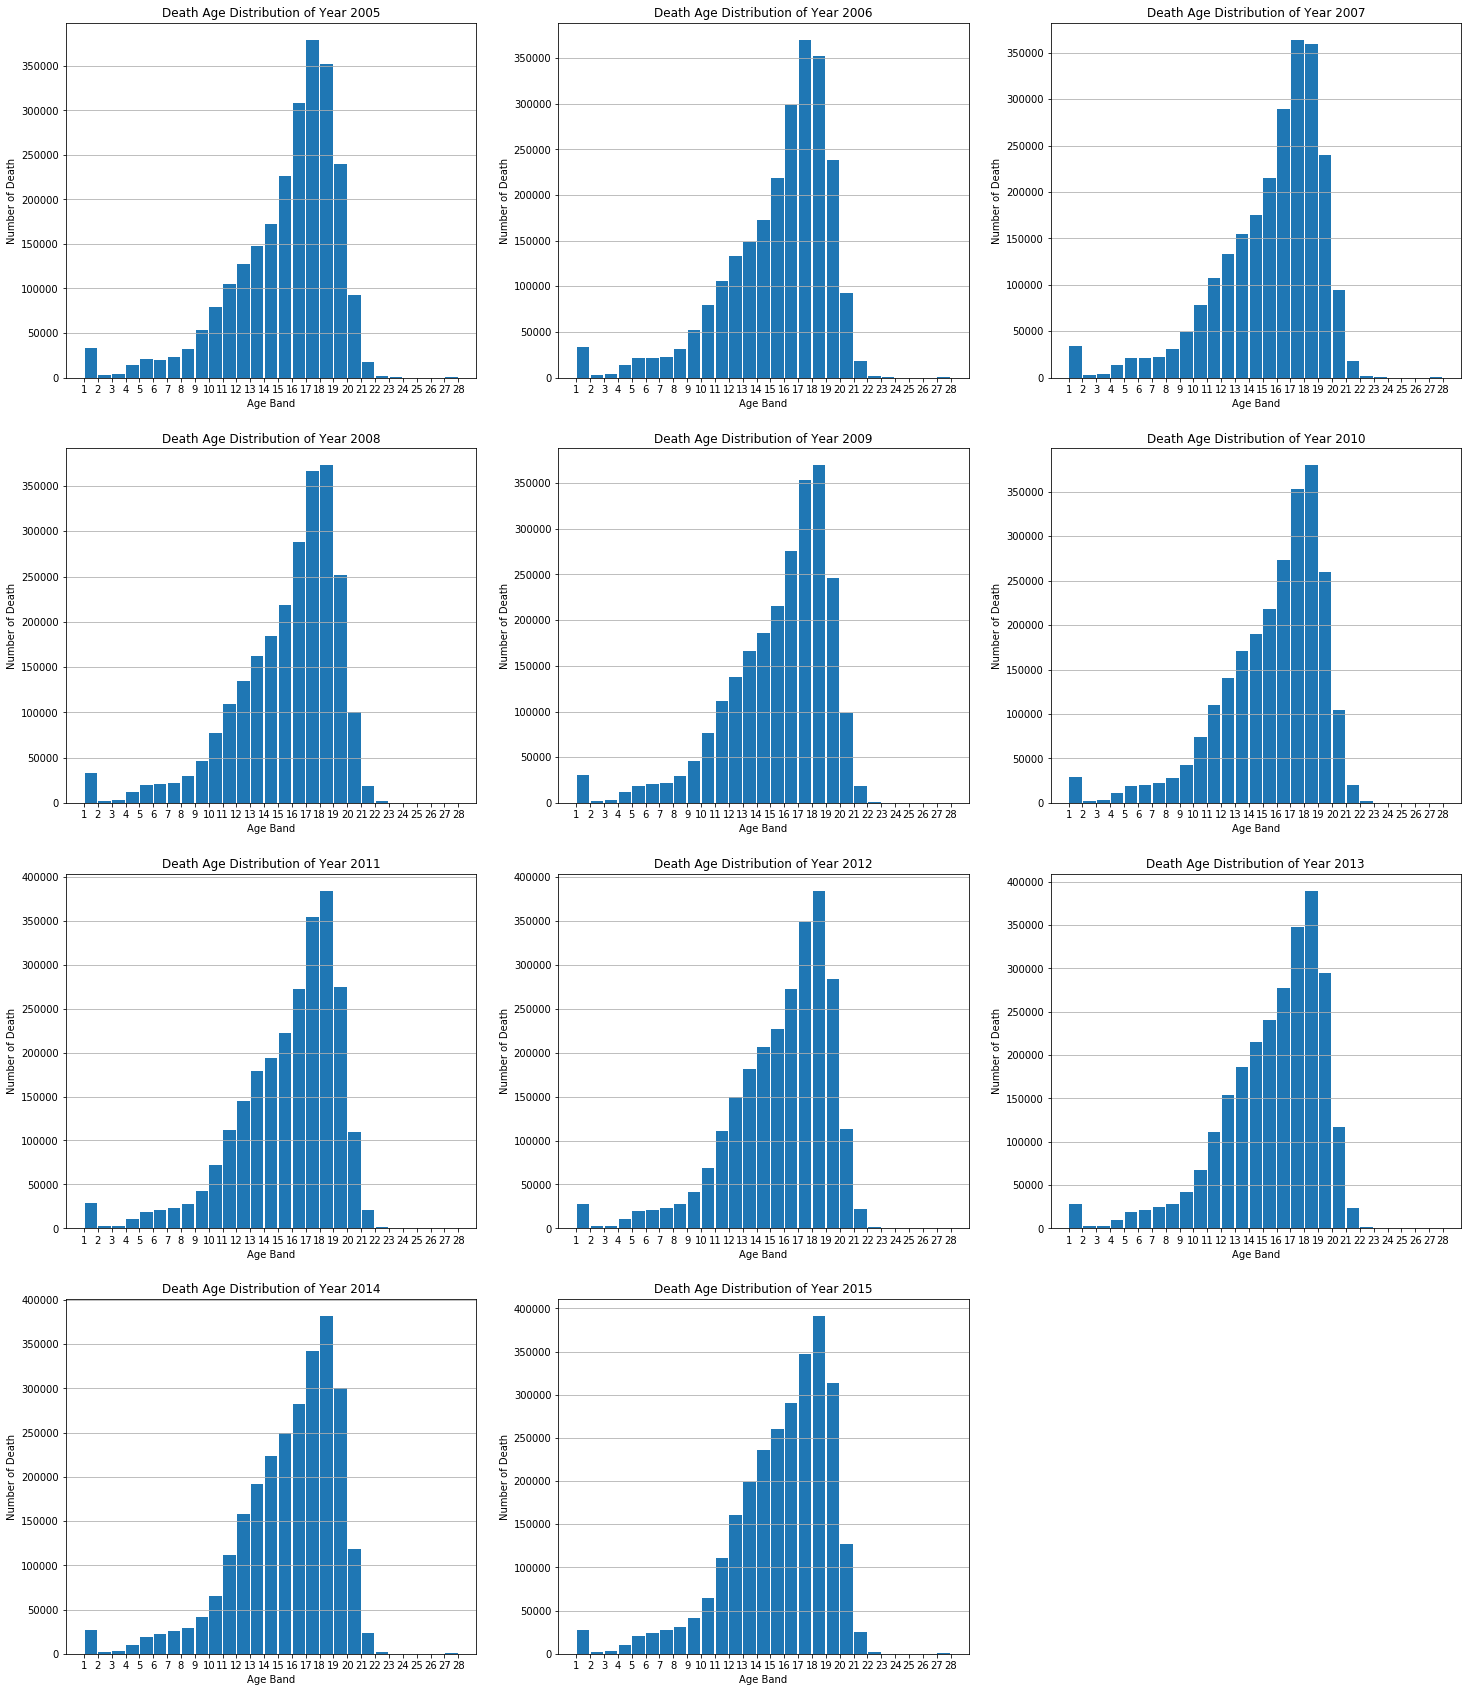

In [68]:
'''Death age distribution'''
plt.figure(figsize=(25,30))
for i in range(11):
    plt.subplot(4,3,i+1)
    plt.hist(df[i]['5y_age_band_recode'], bins=np.arange(1,29),rwidth=0.9)
    plt.xticks(np.arange(1,29))
    plt.title('Death Age Distribution of Year '+ str(i+2005))
    plt.xlabel('Age Band')
    plt.ylabel('Number of Death')
    plt.grid(axis='y')

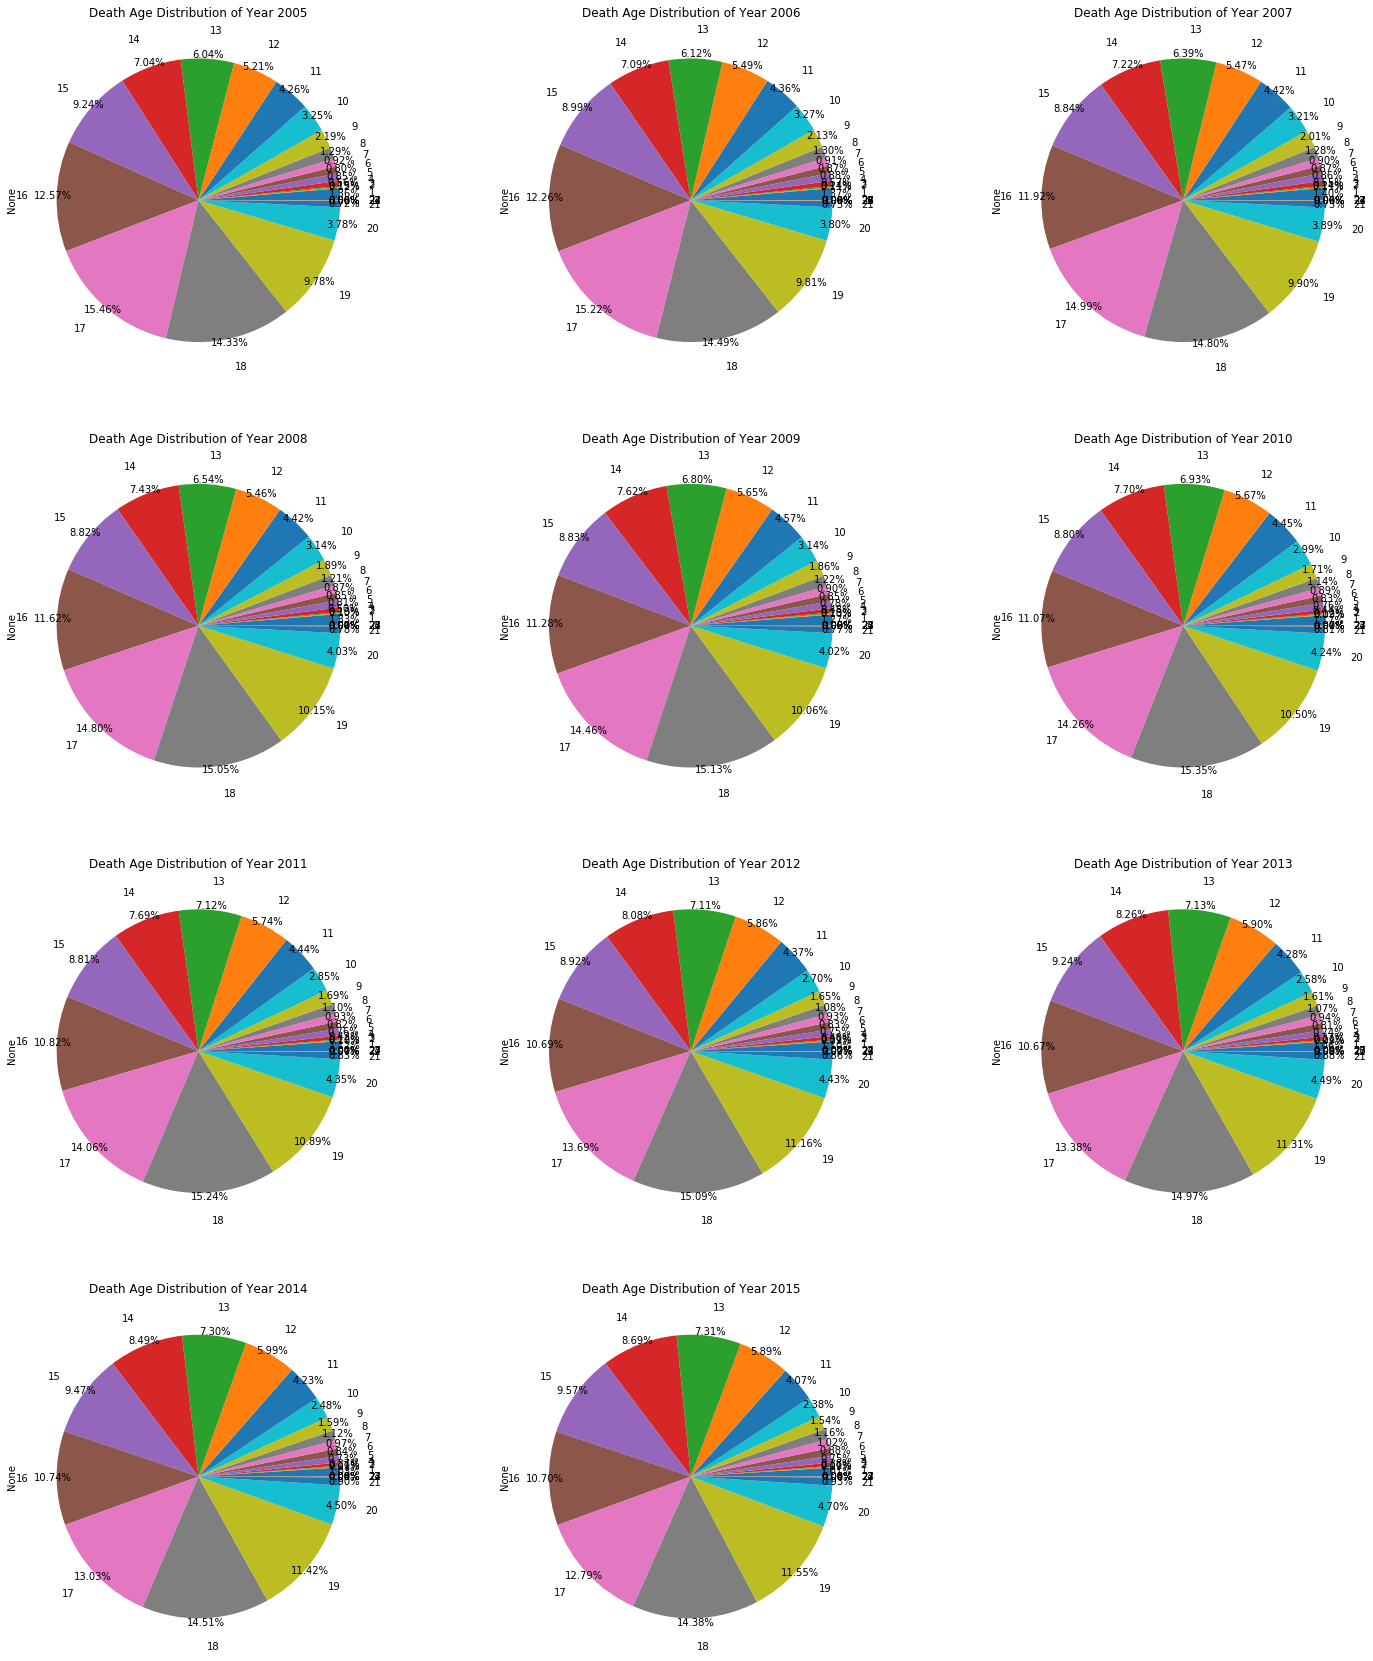

In [81]:
'''Death age band percentage'''
plt.figure(figsize=(25,30))
for i in range(11):
    data = df[i].groupby('5y_age_band_recode').size()
    plt.subplot(4,3,i+1)
    data.plot(kind='pie', subplots=True, autopct='%1.2f%%', labeldistance = 1.2,pctdistance =1.03)
    plt.title('Death Age Distribution of Year '+str(i+2005))
    

Text(0.5, 1.0, 'Box Plot - Death Age VS Year')

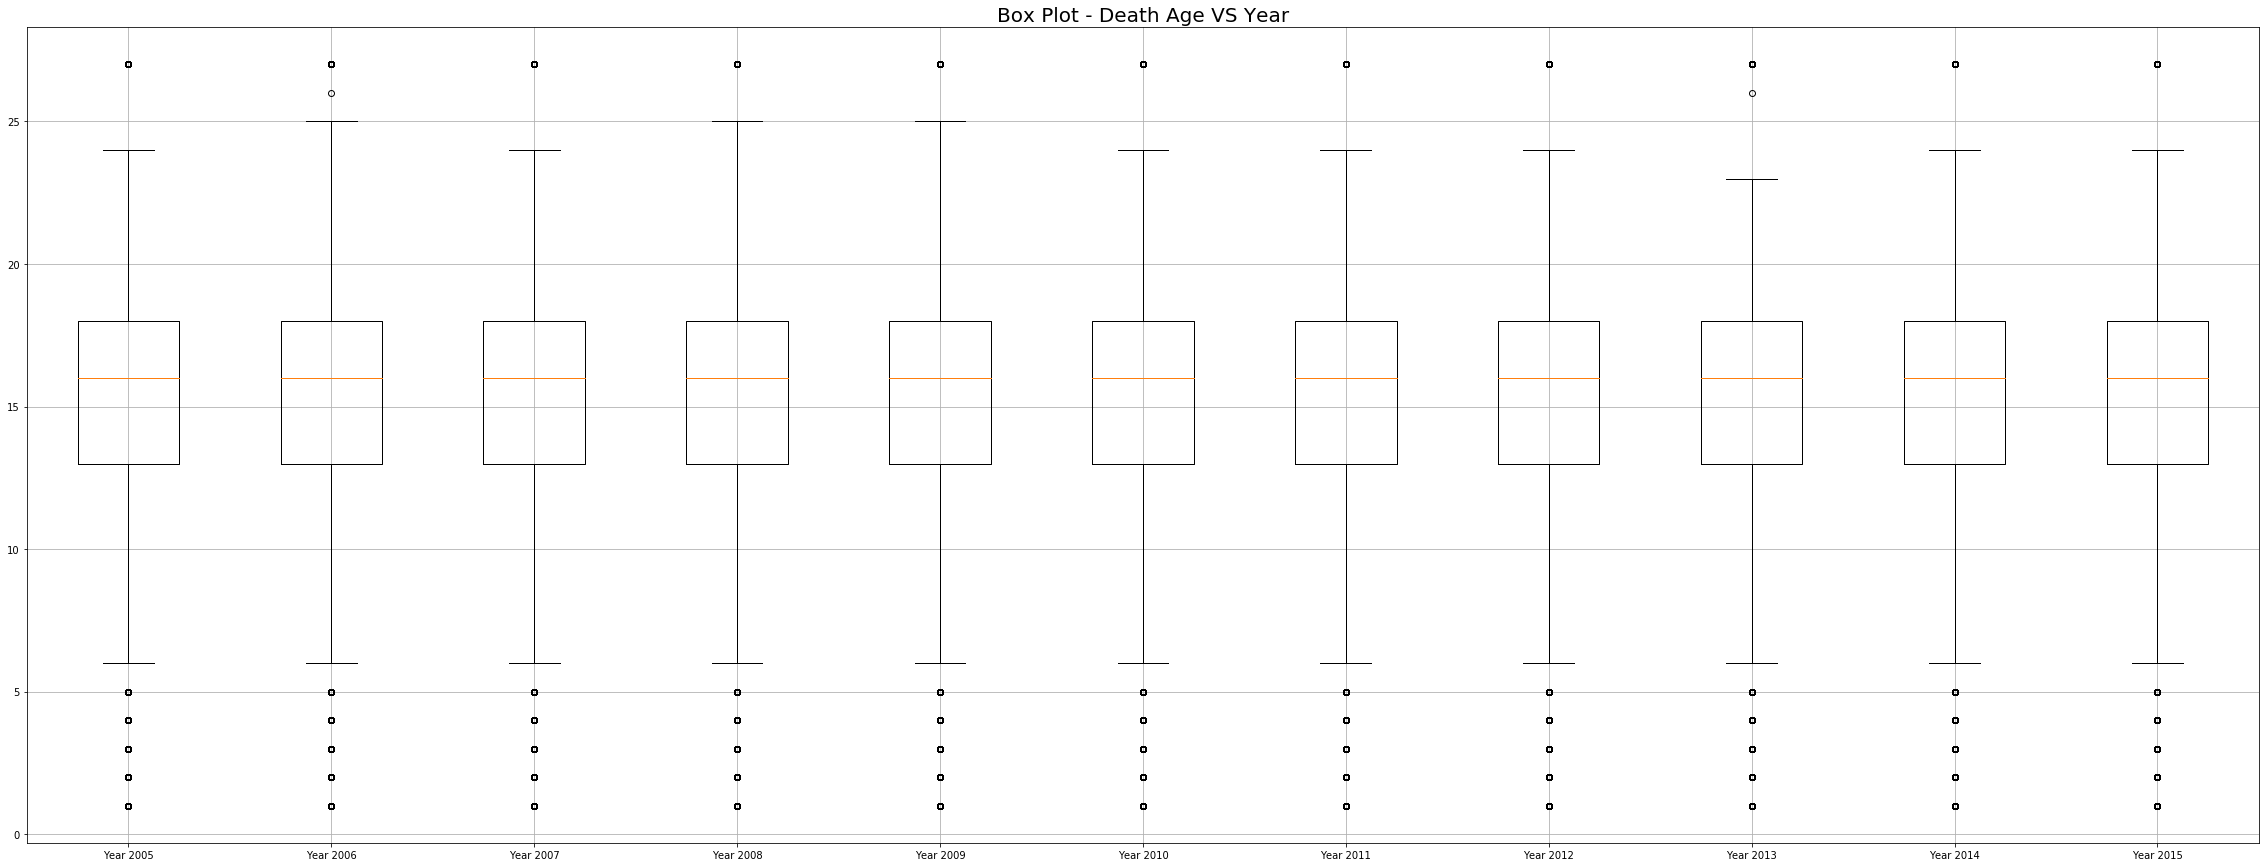

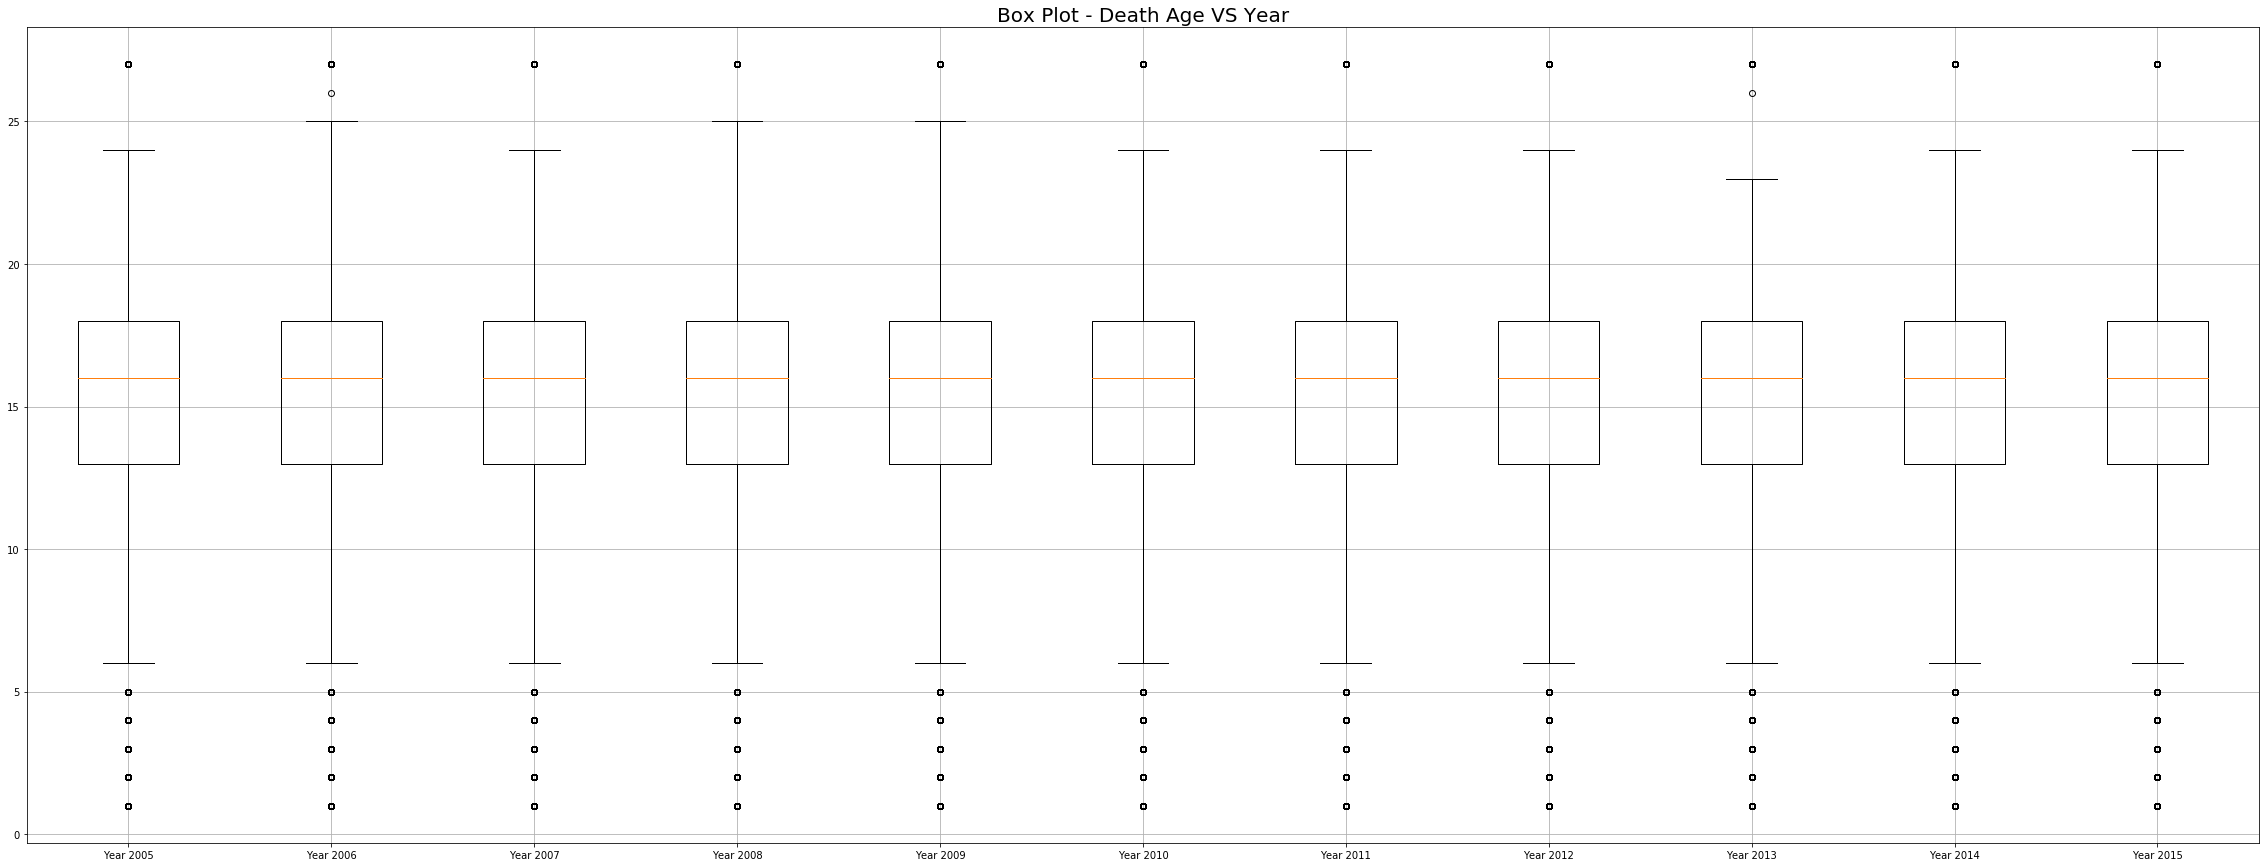

In [49]:
'''Death Age Trend Analysis'''
# Box plot
# x-axis: 11 years
# y-axis: Death age Band (Try different age band)

# data['2005','2006'...'2015'] each-death age band number
data1 = []
for i in range(11):
    data1.append(df[i]['5y_age_band_recode'].values)

plt.figure(figsize=(40,15))
plt.boxplot(data1, labels=['Year '+str(i) for i in range(2005,2016)])
plt.grid(b=True)
plt.title('Box Plot - Death Age Band VS Year', fontsize=20)

#Using Detail age to plot
data2 = []
for i in range(11):
    data2.append(df[i]['detail_age'].values)

plt.figure(figsize=(40,15))
plt.boxplot(data1, labels=['Year '+str(i) for i in range(2005,2016)])
plt.grid(b=True)
plt.title('Box Plot - Detail Death Age VS Year', fontsize=20)

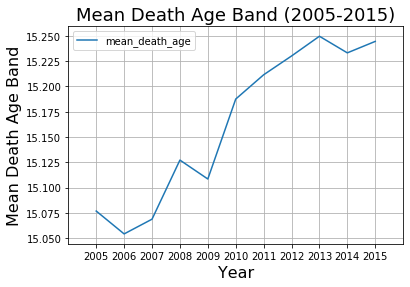

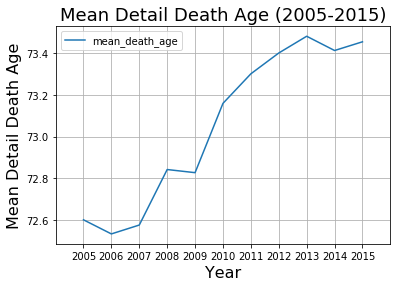

In [84]:
# Mean Death Age Change Over Years

# using age band to plot
mean_age_df = pd.DataFrame(data=[i for i in range(2005,2016)], columns=['year'], dtype=int)
mean_age_df['mean_death_age'] = [np.mean(data1[i]) for i in range(11)]
#plot the mean death age vs year
mean_age_df.plot(x = 'year', y = 'mean_death_age')
plt.title('Mean Death Age Band (2005-2015)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Death Age Band', fontsize=16)
plt.xticks(np.arange(2005,2016))
plt.xlim((2004,2016))
plt.grid(True)

#using detail age to plot
mean_age_df = pd.DataFrame(data=[i for i in range(2005,2016)], columns=['year'], dtype=int)
mean_age_df['mean_death_age'] = [np.mean(data2[i]) for i in range(11)]
#plot the mean death age vs year
mean_age_df.plot(x = 'year', y = 'mean_death_age')
plt.title('Mean Detail Death Age (2005-2015)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Detail Death Age', fontsize=16)
plt.xticks(np.arange(2005,2016))
plt.xlim((2004,2016))
plt.grid(True)

In [115]:
'''Age Band Specific Leading Causes of Death'''
# dataframe: age_bands_cause_df 
# cols=['year', 'age_band', 'rankable_caused_recode']
# data: number of death of each cause

#init dataframe to store data
col_name = ['year', 'age_band']
col_name.extend([str(i) for i in range(1,28)])
age_bands_cause_df = pd.DataFrame(data=np.zeros((11*27,29), dtype=int), columns=col_name)
year = []
for i in range(2005,2016):
    year.extend([i]*27)
age_bands_cause_df['year'] = year
age_bands_cause_df['age_band'] = [i+1 for i in range(27)]*11

#calculate data
for i in range(2005,2016): # loop for 11 years
    # use groupby to calculate data for each year
    gp_data = df[i-2005].groupby(['5y_age_band_recode','rankable_cause_recode']).size()
    data_df = gp_data.unstack().fillna(0).astype(int)
    # insert absent rows for certain age_band
    absent_rows = list(set([i for i in range(1,28)])-set(data_df.index.values))
    for item in absent_rows:
        data_df.loc[item] = 0
    data_df.sort_index(inplace=True)
    
    # assign each year value to the df
    age_bands_cause_df.loc[age_bands_cause_df['year']==i,2:] = data_df.values

age_bands_cause_df[-28:]

,year,age_band,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
269,2014,27,0,0,2,15,2,0,57,1,...,1,0,1,160,21,11,44,7,8,7
270,2015,1,1,2,4,416,8,0,441,7,...,11699,5280,1568,1507,2650,489,2075,0,634,151
271,2015,2,0,0,0,445,5,0,87,0,...,13,184,0,51,526,399,365,4,140,26
272,2015,3,0,0,1,430,18,0,128,0,...,8,156,0,65,651,465,318,409,158,31
273,2015,4,1,0,4,592,52,0,306,2,...,9,195,0,156,896,2632,1335,2064,1589,138
274,2015,5,3,0,96,893,145,0,694,13,...,2,194,0,420,1723,4384,4307,3432,3159,398
275,2015,6,9,1,218,1339,282,0,1284,48,...,1,211,0,526,2342,3681,6354,3447,2705,501
276,2015,7,3,0,316,2384,518,0,2248,73,...,2,232,0,633,3253,2864,7079,3523,2176,561
277,2015,8,9,0,456,3881,718,2,3680,171,...,2,221,0,632,4164,2536,6761,3348,1646,530
278,2015,9,12,1,603,7063,1269,9,6754,300,...,0,264,0,690,5948,2351,6422,3610,1260,536


In [117]:
# totalyear_ageband_cause_df 
# cols: ['age_band', 'rankable_cause_recode']
# data: number of cause of age_band & cause

combineyear_ageband_cause_df = age_bands_cause_df.drop(columns='year').groupby('age_band').sum().reset_index()
combineyear_ageband_cause_df

,age_band,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,24,18,36,4737,87,0,5592,40,1887,...,142102,63108,21918,15414,32214,6360,22891,0,7492,1757
1,2,8,0,10,5059,73,0,960,8,462,...,172,2017,0,551,6014,4937,4400,56,1405,239
2,3,7,1,44,5009,238,0,1389,5,513,...,133,1831,0,736,6854,6340,4439,3219,2015,400
3,4,21,2,217,7170,538,0,3674,50,749,...,113,2292,0,2174,11141,38162,16737,18831,20149,1800
4,5,49,1,1355,10625,1471,1,7635,170,1298,...,62,2407,0,4675,18325,53316,40542,32217,33922,4447
5,6,85,2,3399,15149,2652,3,13247,398,2102,...,39,2342,0,5585,23359,39717,50660,32380,27814,5155
6,7,78,4,5896,24737,4582,5,22971,780,3830,...,22,2254,0,6135,29901,31035,52804,31616,21510,5262
7,8,114,9,10021,44731,7599,23,41095,1466,7103,...,18,2349,0,7106,42813,28790,55027,34088,16574,5603
8,9,168,13,15664,91056,13722,77,81412,3047,14133,...,32,2678,0,9215,70134,30302,65513,39482,14210,6808
9,10,313,15,18393,188316,24342,273,152301,5490,25409,...,28,3460,0,12146,116286,32341,80434,45285,12698,7912


In [133]:
# select top 3 cause for each age band
top5_ageband_causecode = []
for i in range(27):
    top5_ageband_causecode.append(list(combineyear_ageband_cause_df.loc[24].sort_values(ascending=False).drop('age_band',axis=0).index.values[:5]))
print(top5_ageband_causecode)

[['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1'], ['22', '12', '7', '9', '1']]


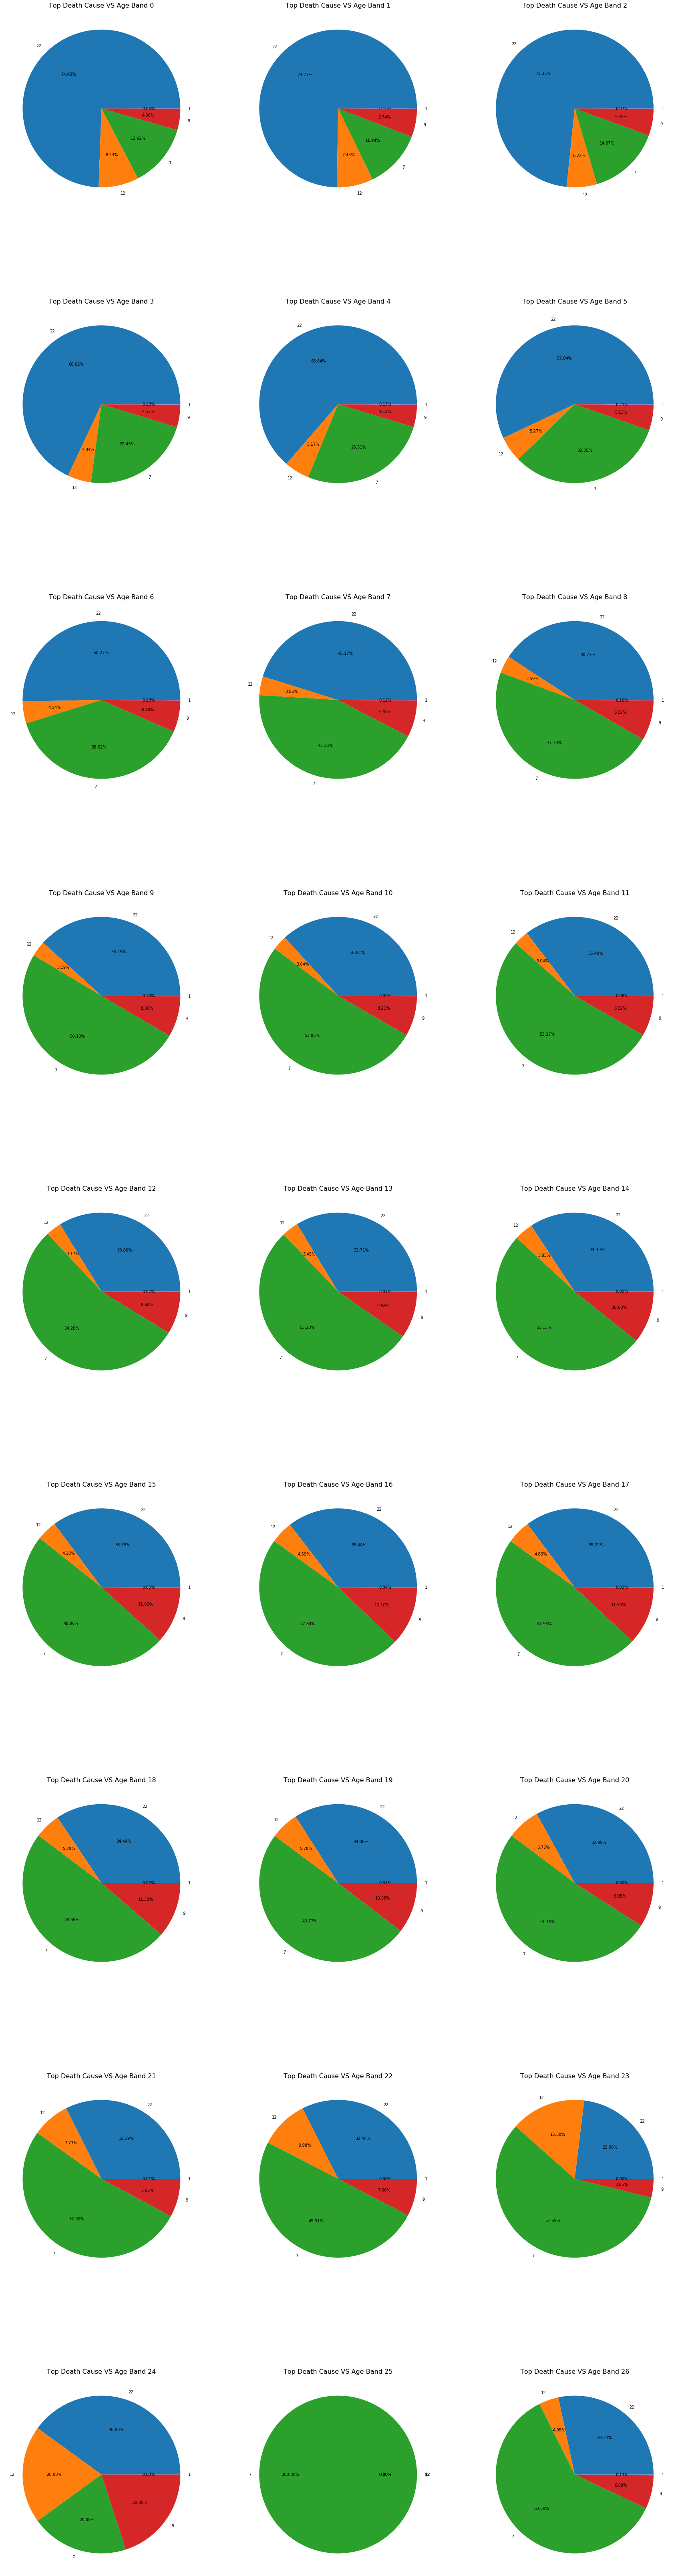

In [144]:
# 27 pie chart - overall trend and 
# x-axis: Age Band
# y-axis: Top Causes Percentage

# 27 pie chart
def drawpiechart(x, labels, title, subplotshape, figsize):
    plt.figure(figsize=figsize)
    
    for i in range(subplotshape[0]*subplotshape[1]):
        plt.subplot(subplotshape[0],subplotshape[1],i+1)
        plt.pie(x[i],labels=labels[i], autopct='%1.2f%%')
        plt.title(title[i], fontsize=16)

X = []
labels = []
title = []
subplotshape = (9,3)
for i in range(27):
    X.append(combineyear_ageband_cause_df.loc[i,top5_ageband_causecode[i]])
    labels.append(top5_ageband_causecode[i])
    title.append('Top Death Cause VS Age Band '+str(i))

drawpiechart(X,labels,title,subplotshape, (30,120))

In [ ]:
# plot: top 3 causes change over years for [number] of age bands
Top Death Cause VS Year